## ASSIGNMENT 1

**PREPARE DATA**



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve
from math import sqrt

df = pd.read_csv('https://www.stlouisfed.org/-/media/project/frbstl/stlouisfed/research/fred-md/monthly/current.csv?sc_lang=en&hash=80445D12401C59CF716410F3F7863B64')

df_cleaned = df.drop(index=0)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned['sasdate'] = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
df_cleaned


,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-01-01,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,1959-02-01,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,1959-03-01,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,1959-04-01,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,1959-05-01,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5476,24.3911,23.1161,32.5567,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2024-08-01,20007.209,16322.1,121.052,1.530317e+06,710038.00000,103.0135,100.9825,100.9803,102.2118,...,119.653,128.291,31.26,35.81,27.97,67.9,551667.22,933066.90,5327.6461,19.6750
788,2024-09-01,20044.142,16333.7,121.690,1.541305e+06,716388.00000,102.5969,100.3826,100.0630,101.9696,...,119.220,128.682,31.44,36.00,28.11,70.1,553347.06,934283.59,5368.5818,17.6597
789,2024-10-01,20128.752,16397.9,121.948,1.539382e+06,720393.00000,102.0854,99.5434,98.9267,101.3127,...,119.064,129.169,31.55,36.22,28.14,70.5,554377.25,937299.96,5407.3304,19.9478
790,2024-11-01,20161.687,16432.8,122.519,1.544190e+06,725925.00000,102.2549,99.8216,99.4970,101.7893,...,119.112,129.375,31.61,36.21,28.29,71.8,555000.61,938899.31,5382.4019,15.9822


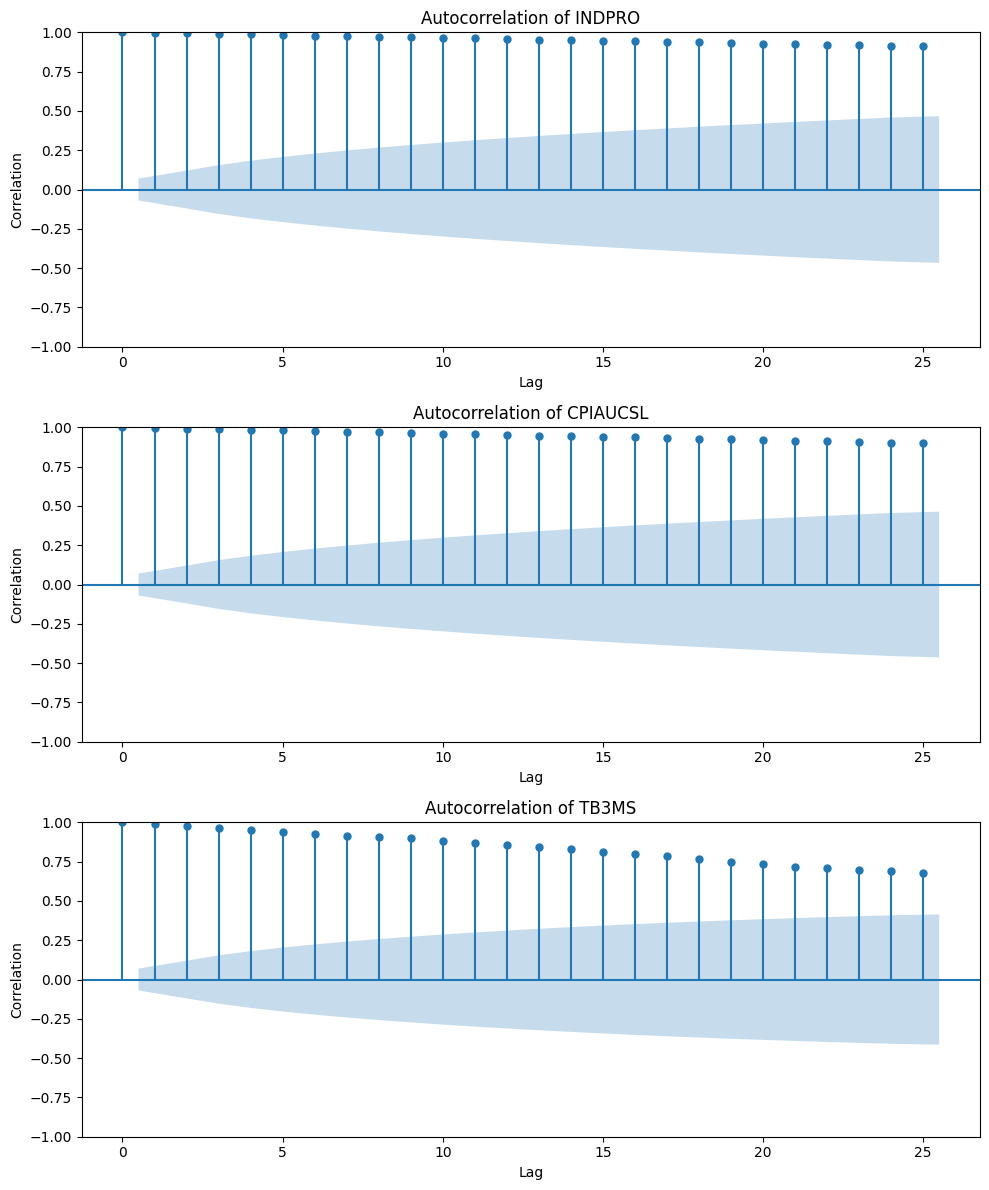

In [50]:
# Check for autocorrelation with Autocorrelation Functiin (ACF)
from statsmodels.graphics.tsaplots import plot_acf

series = df_cleaned['INDPRO']
series2 = df_cleaned['CPIAUCSL']
series3 = df_cleaned['TB3MS']

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
plot_acf(series, lags=25, ax=axes[0], title='Autocorrelation of INDPRO')
plot_acf(series2, lags=25, ax=axes[1], title='Autocorrelation of CPIAUCSL')
plot_acf(series3, lags=25, ax=axes[2], title='Autocorrelation of TB3MS')

for ax in axes:
    ax.set_xlabel('Lag')
    ax.set_ylabel('Correlation')

plt.tight_layout()
plt.show()

Since there are autocorrelation in all 3 variables, the transformation with differencing is necessary. From csv file of the Dataset, the 2nd row indicating the transformation code for us to apply to reach stationary.

In [51]:
transformation_codes = df.iloc[0, 1:].to_frame().reset_index()
transformation_codes.columns = ['Series', 'Transformation_Code']

def apply_transformation(series, code):
    if code == 1:
        return series
    elif code == 2:
        return series.diff()
    elif code == 3:
        return series.diff().diff()
    elif code == 4:
        return np.log(series)
    elif code == 5:
        return np.log(series).diff()
    elif code == 6:
        return np.log(series).diff().diff()
    elif code == 7:
        return series.pct_change()
    else:
        raise ValueError("Invalid transformation code")

for series_name, code in transformation_codes.values:
    df_cleaned[series_name] = apply_transformation(df_cleaned[series_name].astype(float), float(code))

df_cleaned = df_cleaned[2:]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()


,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014300,0.006036,0.004896,0.000000,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1,1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021080,0.014339,0.014545,0.015652,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
2,1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014954,0.008267,0.009580,0.004766,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
3,1959-06-01,0.003068,0.003012,0.003642,-0.000097,0.009064,0.001137,0.007035,0.007125,-0.004766,...,0.003334,0.001946,-0.004619,0.003992,0.004796,NaN,0.009726,0.009007,-0.012252,NaN
4,1959-07-01,-0.000580,-0.000762,-0.003386,0.012155,-0.000330,-0.024237,0.001168,0.008251,0.013056,...,-0.001204,-0.000013,0.000000,-0.004040,-0.004796,NaN,-0.004631,-0.001000,0.029341,NaN


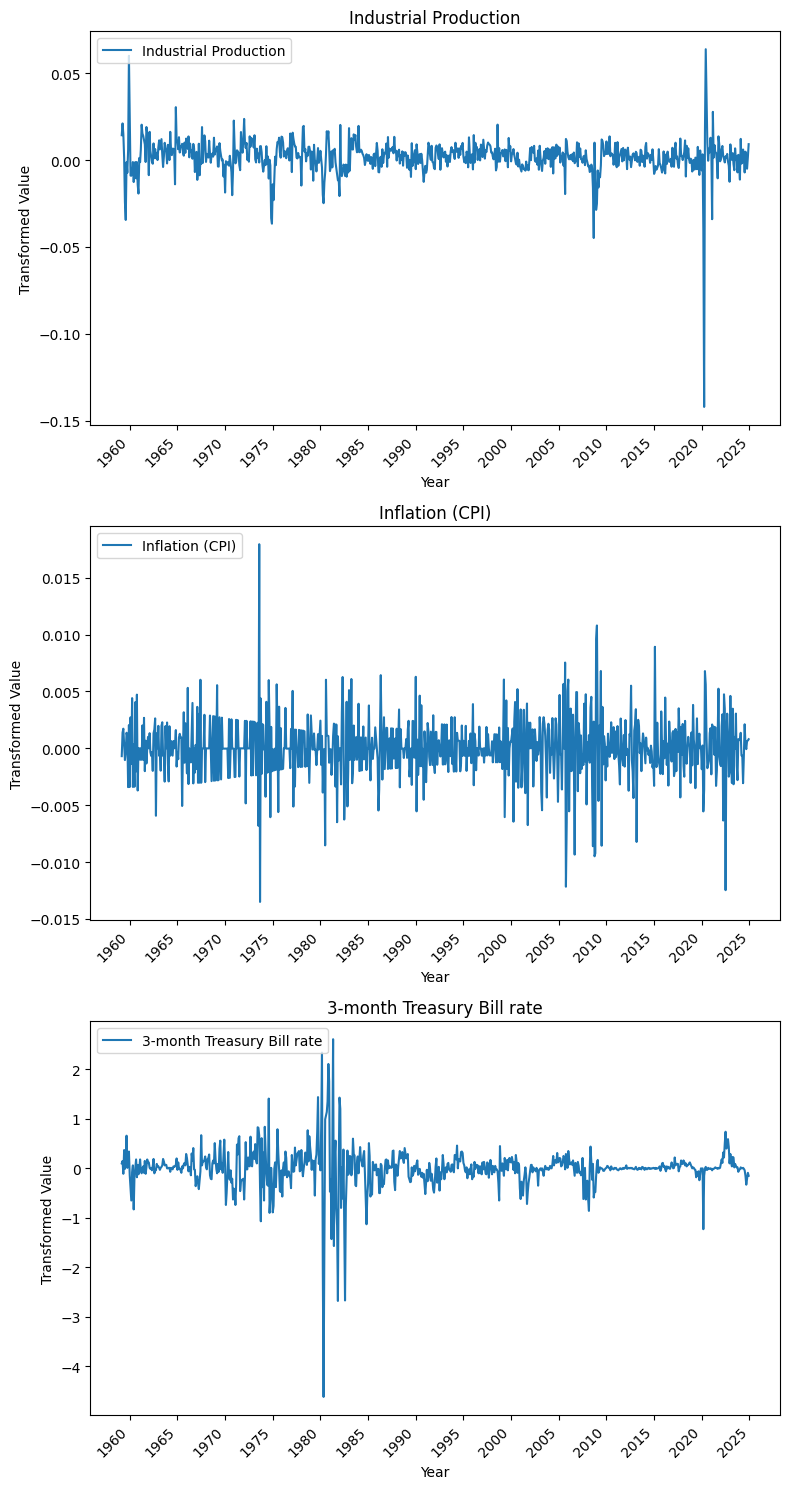

In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

series_to_plot = ['INDPRO', 'CPIAUCSL', 'TB3MS']
series_names = ['Industrial Production',
                'Inflation (CPI)',
                '3-month Treasury Bill rate']

fig, axs = plt.subplots(len(series_to_plot), 1, figsize=(8, 15))

for ax, series_name, plot_title in zip(axs, series_to_plot, series_names):
    if series_name in df_cleaned.columns:
        dates = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
        ax.plot(dates, df_cleaned[series_name], label=plot_title)
        ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_title(plot_title)
        ax.set_xlabel('Year')
        ax.set_ylabel('Transformed Value')
        ax.legend(loc='upper left')
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

The data is now presented in 3 graphs, now we turns to forecasting

We conduct a quick check of Autocorrelation again, this time with the transformed value. Also we find the proper lags good for predictive model.

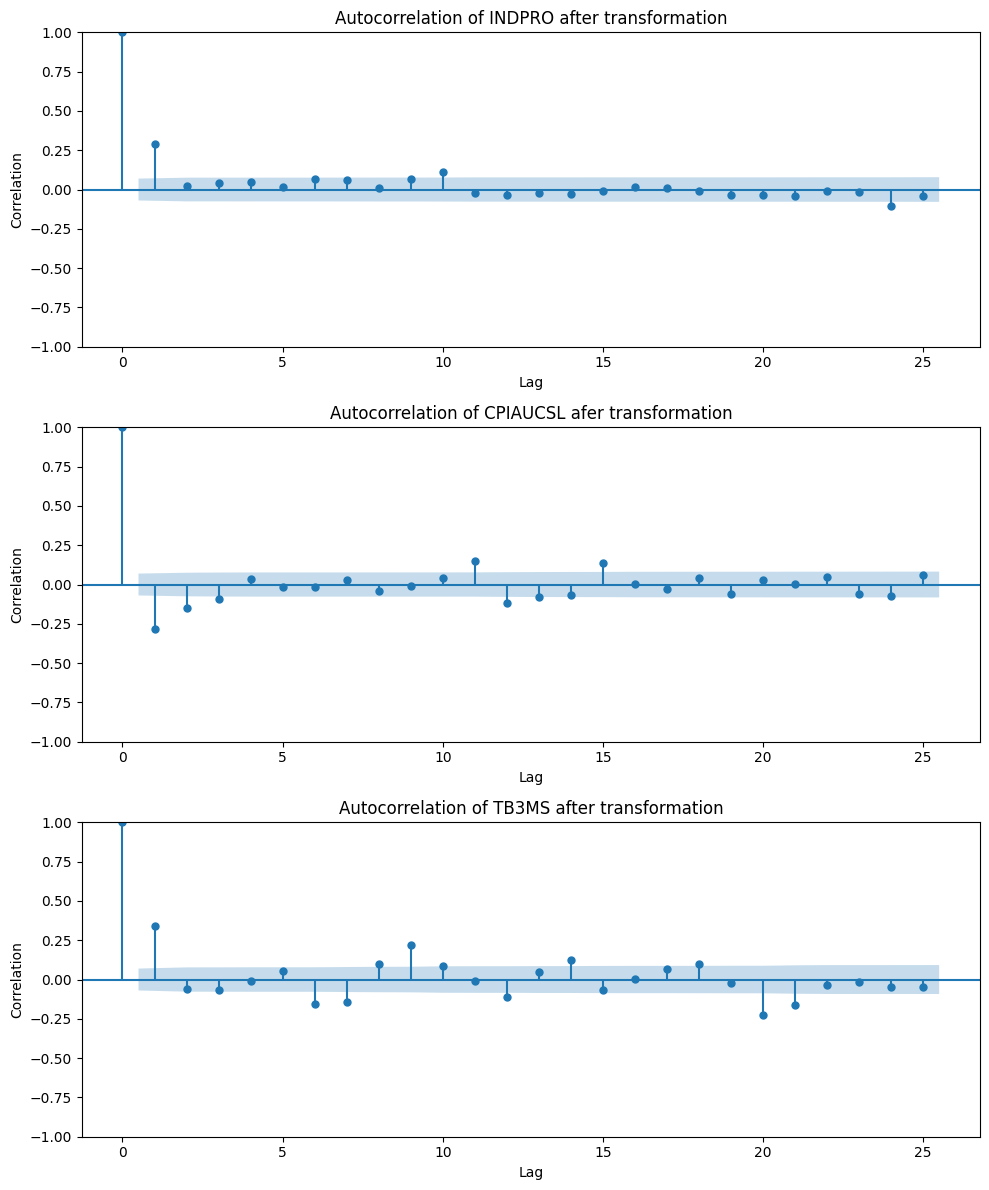

In [55]:
# Check which lag variable good for predictive model
# plot in a readable way with Autocorrelation Function
series = df_cleaned['INDPRO']
series2 = df_cleaned['CPIAUCSL']
series3 = df_cleaned['TB3MS']

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
plot_acf(series, lags=25, ax=axes[0], title='Autocorrelation of INDPRO after transformation')
plot_acf(series2, lags=25, ax=axes[1], title='Autocorrelation of CPIAUCSL afer transformation')
plot_acf(series3, lags=25, ax=axes[2], title='Autocorrelation of TB3MS after transformation')

for ax in axes:
    ax.set_xlabel('Lag')
    ax.set_ylabel('Correlation')

plt.tight_layout()
plt.show()

From the result of Autocorrelation testing, we may conclude:
* High autocorrelation at lag 1 -> a strong relationship with the immediate past value.
* Most of the other lags within confidence interval - not significantly different from zero - past values beyond the immediate previous one do not strongly influence the current value.
* No seasonality in the data.
* The series likely follows a short-memory process -> AR(1) model might be appropriate for forecasting.



---



FORECAST IN TIME SERIES
predicting the log-difference of industrial production
*   INDPRO: target variable
*   CPIAUSL and TB3MS is predictors.






From Linear model: Y = XB + u.
Create matrix X, vector Y.
Save last row of X for forecasting (convert to numpy)

In [ ]:
Yraw = df_cleaned['INDPRO']
Xraw = df_cleaned[['CPIAUCSL', 'TB3MS']]

num_lags  = 4
num_leads = 1

X = pd.DataFrame()

col = 'INDPRO'
for lag in range(0,num_lags+1):
        X[f'{col}_lag{lag}'] = Yraw.shift(lag)

for col in Xraw.columns:
    for lag in range(0,num_lags+1):
        X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
X.insert(0, 'Ones', np.ones(len(X)))

X.head()

,Ones,INDPRO_lag0,INDPRO_lag1,INDPRO_lag2,INDPRO_lag3,INDPRO_lag4,CPIAUCSL_lag0,CPIAUCSL_lag1,CPIAUCSL_lag2,CPIAUCSL_lag3,CPIAUCSL_lag4,TB3MS_lag0,TB3MS_lag1,TB3MS_lag2,TB3MS_lag3,TB3MS_lag4
0,1.0,0.014300,NaN,NaN,NaN,NaN,-0.000690,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN
1,1.0,0.021080,0.014300,NaN,NaN,NaN,0.001380,-0.000690,NaN,NaN,NaN,0.15,0.10,NaN,NaN,NaN
2,1.0,0.014954,0.021080,0.014300,NaN,NaN,0.001723,0.001380,-0.000690,NaN,NaN,-0.11,0.15,0.10,NaN,NaN
3,1.0,0.001137,0.014954,0.021080,0.01430,NaN,0.000339,0.001723,0.001380,-0.00069,NaN,0.37,-0.11,0.15,0.10,NaN
4,1.0,-0.024237,0.001137,0.014954,0.02108,0.0143,-0.001034,0.000339,0.001723,0.00138,-0.00069,-0.01,0.37,-0.11,0.15,0.1


In [ ]:
y = Yraw.shift(-num_leads)
y

,INDPRO
0,0.021080
1,0.014954
2,0.001137
3,-0.024237
4,-0.034464
...,...
785,-0.004052
786,-0.004998
787,0.001659
788,0.009144


In [ ]:
X_T = X.iloc[-1:].values

y = y.iloc[num_lags:-num_leads].values
X = X.iloc[num_lags:-num_leads].values

X_T

array([[ 1.00000000e+00,  9.14393438e-03,  1.65899765e-03,
        -4.99799997e-03, -4.05232975e-03,  4.80994949e-03,
         7.99576232e-04,  6.86384504e-04,  6.40500497e-04,
        -7.34005858e-05,  3.22375521e-04, -1.50000000e-01,
        -9.00000000e-02, -2.10000000e-01, -3.30000000e-01,
        -1.50000000e-01]])

Estimate parameters and obtain forecast: Finding B with OLS

In [ ]:
from numpy.linalg import solve

beta_ols = solve(X.T @ X, X.T @ y)

forecast = X_T@beta_ols*100
forecast

array([0.3855251])

Real-time evaluation: set T = 12/1999 > Estimate model till T > Product Yhat of T+1, T+2,...T+H > Then caculate forecasting errors (MSFE) and Rooted Mean Errors (RMSFE) for each steps h = 1,4,8

Define the calculation of forecast as follow

In [62]:
def calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = '12/1/1999',target = 'INDPRO', xvars = ['CPIAUCSL', 'TB3MS']):

    ## Subset df_cleaned to use only data up to end_date
    rt_df = df_cleaned[df_cleaned['sasdate'] <= pd.Timestamp(end_date)]
    ## Get the actual values of target at different steps ahead
    Y_actual = []
    for h in H:
        os = pd.Timestamp(end_date) + pd.DateOffset(months=h)
        Y_actual.append(df_cleaned[df_cleaned['sasdate'] == os][target]*100)
        ## Now Y contains the true values at T+H (multiplying * 100)

    Yraw = rt_df[target]
    Xraw = rt_df[xvars]

    X = pd.DataFrame()
    ## Add the lagged values of Y
    for lag in range(0,p):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{target}_lag{lag}'] = Yraw.shift(lag)

    for col in Xraw.columns:
        for lag in range(0,p):
            X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)

    ## Add a column on ones (for the intercept)
    X.insert(0, 'Ones', np.ones(len(X)))

    ## Save last row of X (converted to numpy)
    X_T = X.iloc[-1:].values

    ## While the X will be the same, Y needs to be leaded differently
    Yhat = []
    for h in H:
        y_h = Yraw.shift(-h)
        ## Subset getting only rows of X and y from p+1 to h-1
        y = y_h.iloc[p:-h].values
        X_ = X.iloc[p:-h].values
        # Solving for the OLS estimator beta: (X'X)^{-1} X'Y
        beta_ols = solve(X_.T @ X_, X_.T @ y)
        ## Produce the One step ahead forecast
        ## % change month-to-month INDPRO
        Yhat.append(X_T@beta_ols*100)

    ## Now calculate the forecasting error and return

    return np.array(Y_actual) - np.array(Yhat)

t0 = pd.Timestamp('12/1/1999')
e = []
T = []
for j in range(0, 10):
    t0 = t0 + pd.DateOffset(months=1)
    print(f'Using data up to {t0}')
    ehat = calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = t0)
    e.append(ehat.flatten())
    T.append(t0)

## Create a pandas DataFrame from the list
edf = pd.DataFrame((e), columns=["h=1", "h=4", "h=8"])

# Compute MSFE and RMSE
msfe = edf.apply(np.square).mean()
rmse = np.sqrt(msfe)

results_df_p4 = pd.DataFrame({"MSFE": msfe, "RMSE": rmse})
print(results_df_p4)

Using data up to 2000-01-01 00:00:00
Using data up to 2000-02-01 00:00:00
Using data up to 2000-03-01 00:00:00
Using data up to 2000-04-01 00:00:00
Using data up to 2000-05-01 00:00:00
Using data up to 2000-06-01 00:00:00
Using data up to 2000-07-01 00:00:00
Using data up to 2000-08-01 00:00:00
Using data up to 2000-09-01 00:00:00
Using data up to 2000-10-01 00:00:00
         MSFE      RMSE
h=1  0.119292  0.345387
h=4  0.266600  0.516334
h=8  0.393190  0.627048


The results give the intuition that: Longer-term forecasts tend to have higher errors, which is the typical case.



---



Now we may test for different models, with different lags. For example, given lag = 1

In [60]:
def calculate_forecast_p1(df_cleaned, p=1, H=[1,4,8], end_date='12/1/1999', target='INDPRO', xvars=['CPIAUCSL', 'TB3MS']):
    rt_df = df_cleaned[df_cleaned['sasdate'] <= pd.Timestamp(end_date)]

    Y_actual = []
    for h in H:
        os = pd.Timestamp(end_date) + pd.DateOffset(months=h)
        Y_actual.append(df_cleaned[df_cleaned['sasdate'] == os][target] * 100)  # Convert to percentage

    Yraw = rt_df[target]
    Xraw = rt_df[xvars]

    X = pd.DataFrame()
    X[f'{target}_lag1'] = Yraw.shift(1)

    for col in Xraw.columns:
        X[f'{col}_lag1'] = Xraw[col].shift(1)

    X.insert(0, 'Ones', np.ones(len(X)))

    X_T = X.iloc[-1:].values

    Yhat = []
    for h in H:
        y_h = Yraw.shift(-h)
        y = y_h.iloc[p:-h].values
        X_ = X.iloc[p:-h].values

        beta_ols = solve(X_.T @ X_, X_.T @ y)

        Yhat.append(X_T @ beta_ols * 100)

    return np.array(Y_actual) - np.array(Yhat)

t0 = pd.Timestamp('12/1/1999')
e = []
T = []
for j in range(0, 10):
    t0 += pd.DateOffset(months=1)
    print(f'Using data up to {t0}')
    ehat = calculate_forecast_p1(df_cleaned, p=1, H=[1,4,8], end_date=t0)
    e.append(ehat.flatten())
    T.append(t0)

edf = pd.DataFrame(e, columns=["h=1", "h=4", "h=8"])

msfe = edf.apply(np.square).mean()
rmse = np.sqrt(msfe)

results_df_p1 = pd.DataFrame({"MSFE": msfe, "RMSE": rmse})
print(results_df_p1)

Using data up to 2000-01-01 00:00:00
Using data up to 2000-02-01 00:00:00
Using data up to 2000-03-01 00:00:00
Using data up to 2000-04-01 00:00:00
Using data up to 2000-05-01 00:00:00
Using data up to 2000-06-01 00:00:00
Using data up to 2000-07-01 00:00:00
Using data up to 2000-08-01 00:00:00
Using data up to 2000-09-01 00:00:00
Using data up to 2000-10-01 00:00:00
         MSFE      RMSE
h=1  0.108108  0.328797
h=4  0.289920  0.538442
h=8  0.443675  0.666089


With lag = 1, RMSE is lower in case h=1 (0.32 vs 0.34) and higher in case h=4 and h=8. The model predicts better than the case lag=4 in shorter term only.

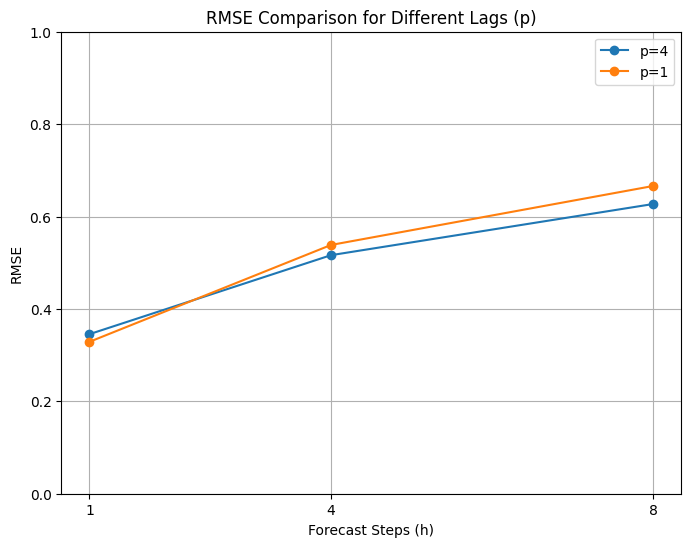

In [64]:
# Extract RMSE values
rmse_p4 = results_df_p4['RMSE'].values
rmse_p1 = results_df_p1['RMSE'].values

# Forecast steps (x-axis)
steps = [1, 4, 8]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(steps, rmse_p4, marker='o', label='p=4')
plt.plot(steps, rmse_p1, marker='o', label='p=1')

# Set plot properties
plt.xlabel('Forecast Steps (h)')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Different Lags (p)')
plt.xticks(steps)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Assignment 1 alternative

**Prepare Dataset**

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import solve
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df = pd.read_csv('https://www.stlouisfed.org/-/media/project/frbstl/stlouisfed/research/fred-md/monthly/current.csv?sc_lang=en&hash=80445D12401C59CF716410F3F7863B64')

df_cleaned = df.drop(index=0)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned['sasdate'] = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')

df_cleaned

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-01-01,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,1959-02-01,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,1959-03-01,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,1959-04-01,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,1959-05-01,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5476,24.3911,23.1161,32.5567,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2024-08-01,20007.209,16322.1,121.052,1.530317e+06,710038.00000,103.0135,100.9825,100.9803,102.2118,...,119.653,128.291,31.26,35.81,27.97,67.9,551667.22,933066.90,5327.6461,19.6750
788,2024-09-01,20044.142,16333.7,121.690,1.541305e+06,716388.00000,102.5969,100.3826,100.0630,101.9696,...,119.220,128.682,31.44,36.00,28.11,70.1,553347.06,934283.59,5368.5818,17.6597
789,2024-10-01,20128.752,16397.9,121.948,1.539382e+06,720393.00000,102.0854,99.5434,98.9267,101.3127,...,119.064,129.169,31.55,36.22,28.14,70.5,554377.25,937299.96,5407.3304,19.9478
790,2024-11-01,20161.687,16432.8,122.519,1.544190e+06,725925.00000,102.2549,99.8216,99.4970,101.7893,...,119.112,129.375,31.61,36.21,28.29,71.8,555000.61,938899.31,5382.4019,15.9822


In [ ]:
transformation_codes = df.iloc[0, 1:].to_frame().reset_index()
transformation_codes.columns = ['Series', 'Transformation_Code']

def apply_transformation(series, code):
    if code == 1:
        return series
    elif code == 2:
        return series.diff()
    elif code == 3:
        return series.diff().diff()
    elif code == 4:
        return np.log(series)
    elif code == 5:
        return np.log(series).diff()
    elif code == 6:
        return np.log(series).diff().diff()
    elif code == 7:
        return series.pct_change()
    else:
        raise ValueError("Invalid transformation code")

for series_name, code in transformation_codes.values:
    df_cleaned[series_name] = apply_transformation(df_cleaned[series_name].astype(float), float(code))

df_cleaned = df_cleaned[2:]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()


,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014300,0.006036,0.004896,0.000000,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1,1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021080,0.014339,0.014545,0.015652,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
2,1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014954,0.008267,0.009580,0.004766,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
3,1959-06-01,0.003068,0.003012,0.003642,-0.000097,0.009064,0.001137,0.007035,0.007125,-0.004766,...,0.003334,0.001946,-0.004619,0.003992,0.004796,NaN,0.009726,0.009007,-0.012252,NaN
4,1959-07-01,-0.000580,-0.000762,-0.003386,0.012155,-0.000330,-0.024237,0.001168,0.008251,0.013056,...,-0.001204,-0.000013,0.000000,-0.004040,-0.004796,NaN,-0.004631,-0.001000,0.029341,NaN


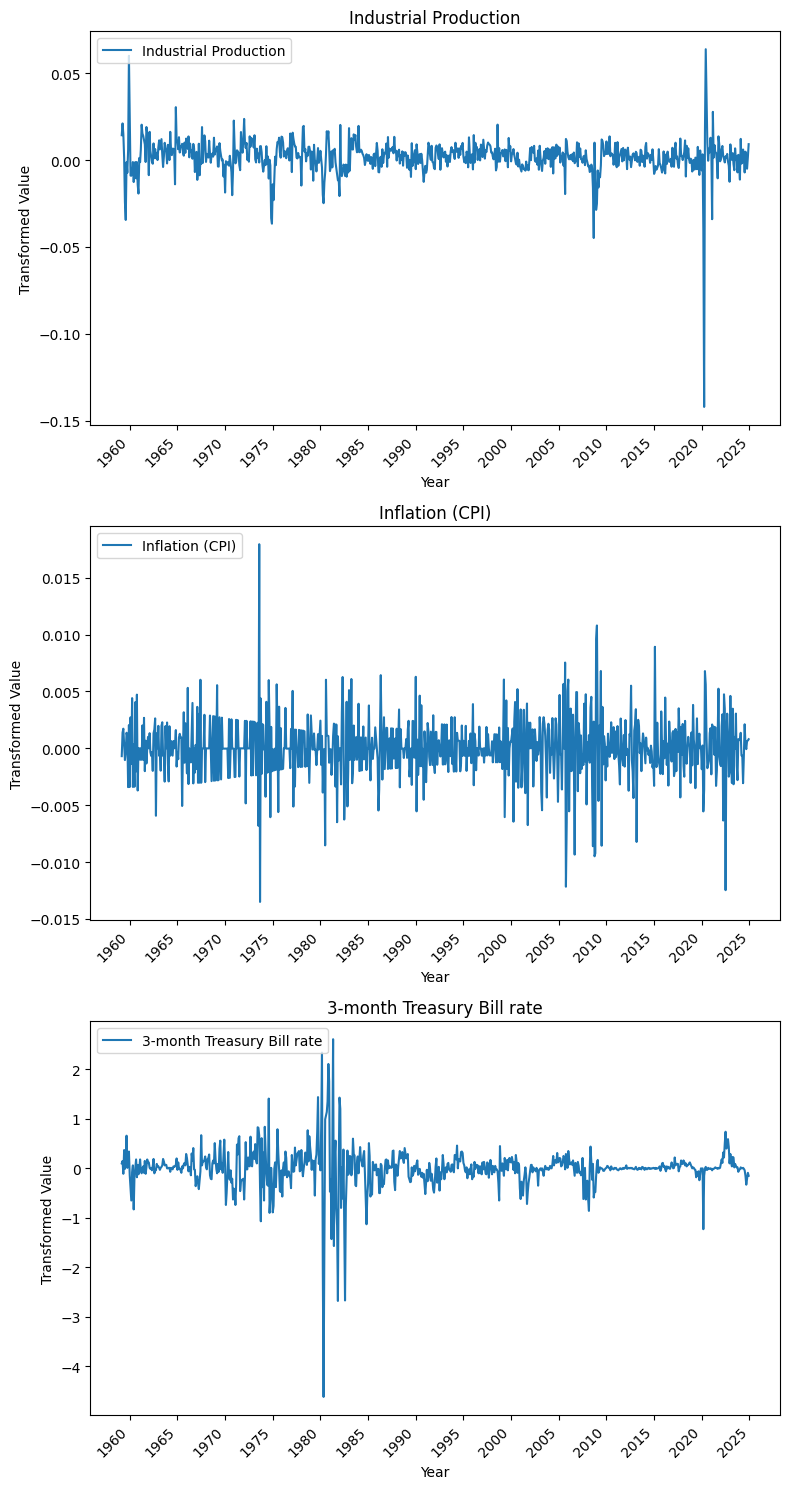

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

series_to_plot = ['INDPRO', 'CPIAUCSL', 'TB3MS']
series_names = ['Industrial Production',
                'Inflation (CPI)',
                '3-month Treasury Bill rate']

fig, axs = plt.subplots(len(series_to_plot), 1, figsize=(8, 15))

for ax, series_name, plot_title in zip(axs, series_to_plot, series_names):
    if series_name in df_cleaned.columns:
        dates = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
        ax.plot(dates, df_cleaned[series_name], label=plot_title)
        ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_title(plot_title)
        ax.set_xlabel('Year')
        ax.set_ylabel('Transformed Value')
        ax.legend(loc='upper left')
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

Check lag variables good for predictive

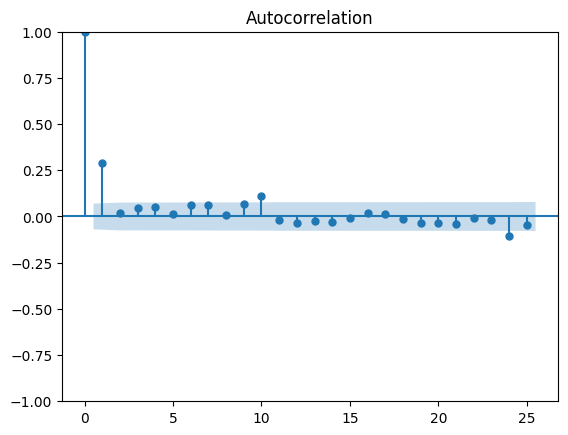

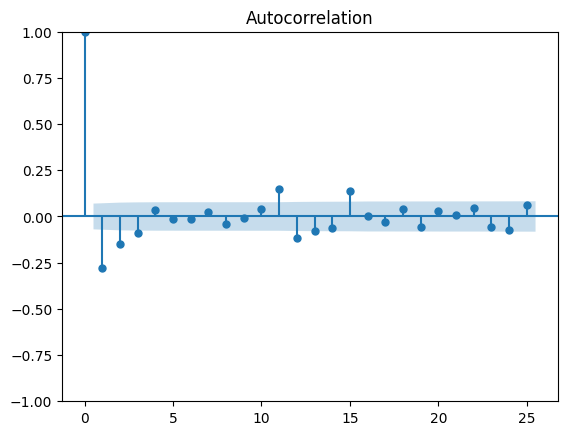

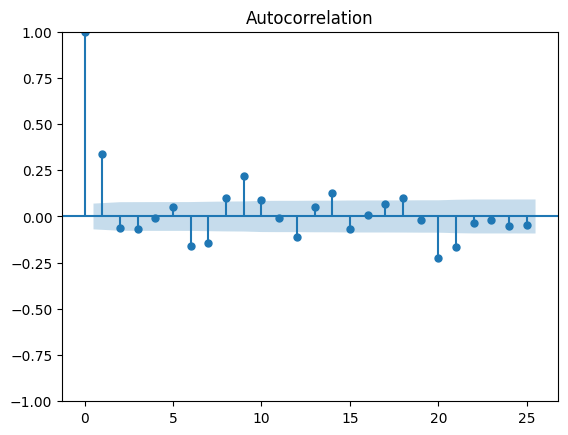

In [ ]:
# Check which lag variable good for predictive model
# plot in a readable way
from statsmodels.graphics.tsaplots import plot_acf

series = df_cleaned['INDPRO']
series2 = df_cleaned['CPIAUCSL']
series3 = df_cleaned['TB3MS']

plot_acf(series, lags=25)
plot_acf(series2, lags=25)
plot_acf(series3, lags=25)

pyplot.show()

From the result of Autocorrelation testing, we may conclude:
* High autocorrelation at lag 1 -> a strong relationship with the immediate past value.
* Most of the other lags within confidence interval - not significantly different from zero - past values beyond the immediate previous one do not strongly influence the current value.
* No seasonality in the data.
* The series likely follows a short-memory process -> AR(1) model might be appropriate for forecasting.

In [ ]:
Yraw = df_cleaned['INDPRO']
Xraw = df_cleaned[['CPIAUCSL', 'TB3MS']]

num_lags  = 4
num_leads = 1

X = pd.DataFrame()

col = 'INDPRO'
for lag in range(0,num_lags+1):
        X[f'{col}_lag{lag}'] = Yraw.shift(lag)

for col in Xraw.columns:
    for lag in range(0,num_lags+1):
        X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
X.insert(0, 'Ones', np.ones(len(X)))

X.head()

,Ones,INDPRO_lag0,INDPRO_lag1,INDPRO_lag2,INDPRO_lag3,INDPRO_lag4,CPIAUCSL_lag0,CPIAUCSL_lag1,CPIAUCSL_lag2,CPIAUCSL_lag3,CPIAUCSL_lag4,TB3MS_lag0,TB3MS_lag1,TB3MS_lag2,TB3MS_lag3,TB3MS_lag4
0,1.0,0.014300,NaN,NaN,NaN,NaN,-0.000690,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN
1,1.0,0.021080,0.014300,NaN,NaN,NaN,0.001380,-0.000690,NaN,NaN,NaN,0.15,0.10,NaN,NaN,NaN
2,1.0,0.014954,0.021080,0.014300,NaN,NaN,0.001723,0.001380,-0.000690,NaN,NaN,-0.11,0.15,0.10,NaN,NaN
3,1.0,0.001137,0.014954,0.021080,0.01430,NaN,0.000339,0.001723,0.001380,-0.00069,NaN,0.37,-0.11,0.15,0.10,NaN
4,1.0,-0.024237,0.001137,0.014954,0.02108,0.0143,-0.001034,0.000339,0.001723,0.00138,-0.00069,-0.01,0.37,-0.11,0.15,0.1


In [ ]:
y = Yraw.shift(-num_leads)
y

,INDPRO
0,0.021080
1,0.014954
2,0.001137
3,-0.024237
4,-0.034464
...,...
785,-0.004052
786,-0.004998
787,0.001659
788,0.009144


In [ ]:
X_T = X.iloc[-1:].values

y = y.iloc[num_lags:-num_leads].values
X = X.iloc[num_lags:-num_leads].values

X_T

array([[ 1.00000000e+00,  9.14393438e-03,  1.65899765e-03,
        -4.99799997e-03, -4.05232975e-03,  4.80994949e-03,
         7.99576232e-04,  6.86384504e-04,  6.40500497e-04,
        -7.34005858e-05,  3.22375521e-04, -1.50000000e-01,
        -9.00000000e-02, -2.10000000e-01, -3.30000000e-01,
        -1.50000000e-01]])

In [ ]:
from numpy.linalg import solve

beta_ols = solve(X.T @ X, X.T @ y)

forecast = X_T@beta_ols*100
forecast

array([0.3855251])

Using data up to 1999-12-01 00:00:00
Using data up to 2000-01-01 00:00:00
Using data up to 2000-02-01 00:00:00
Using data up to 2000-03-01 00:00:00
Using data up to 2000-04-01 00:00:00
Using data up to 2000-05-01 00:00:00
Using data up to 2000-06-01 00:00:00
Using data up to 2000-07-01 00:00:00
Using data up to 2000-08-01 00:00:00
Using data up to 2000-09-01 00:00:00
Using data up to 2000-10-01 00:00:00
Using data up to 2000-11-01 00:00:00
Using data up to 2000-12-01 00:00:00
Using data up to 2001-01-01 00:00:00
Using data up to 2001-02-01 00:00:00
Using data up to 2001-03-01 00:00:00
Using data up to 2001-04-01 00:00:00
Using data up to 2001-05-01 00:00:00
Using data up to 2001-06-01 00:00:00
Using data up to 2001-07-01 00:00:00
Using data up to 2001-08-01 00:00:00
Using data up to 2001-09-01 00:00:00
Using data up to 2001-10-01 00:00:00
Using data up to 2001-11-01 00:00:00
Using data up to 2001-12-01 00:00:00
Using data up to 2002-01-01 00:00:00
Using data up to 2002-02-01 00:00:00
U

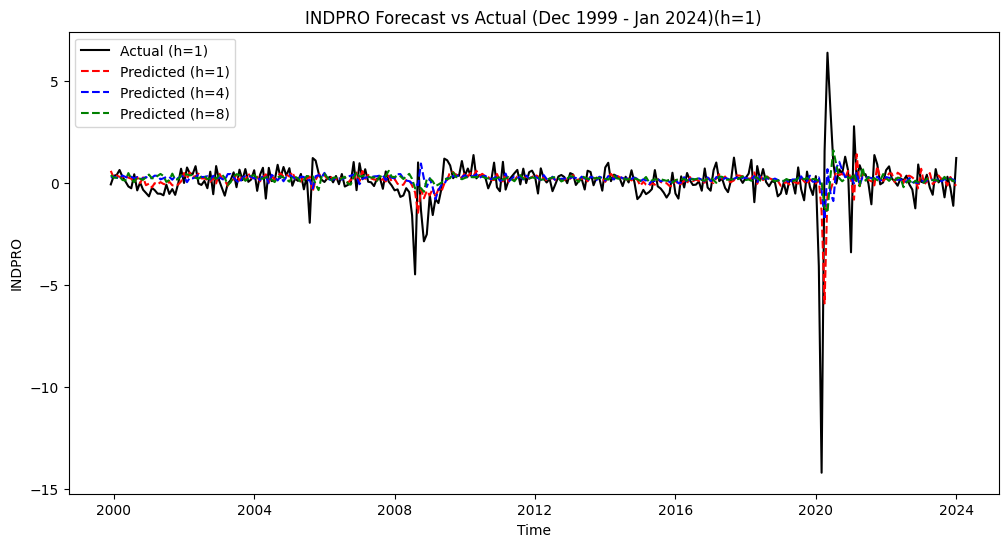

In [ ]:
# Define forecast start and end dates
start_date = pd.Timestamp('12/1/1999')
end_date = pd.Timestamp('1/1/2024')

# Initialize lists for errors, actual values, and predicted values
errors = []
actual_values = []
predicted_values = []
T = []

# Run forecast for each month from Dec 1999 to Jan 2024
t0 = start_date
while t0 <= end_date:
    print(f'Using data up to {t0}')

    # Forecast for different horizons
    ehat = calculate_forecast(df_cleaned, p=4, H=[1, 4, 8], end_date=t0)

    # Store errors
    errors.append(ehat.flatten())

    # Store actual and predicted values
    actual_values.append([df_cleaned[df_cleaned['sasdate'] == t0 + pd.DateOffset(months=h)]['INDPRO'].values[0] * 100 for h in [1, 4, 8]])
    predicted_values.append([actual_values[-1][i] - ehat.flatten()[i] for i in range(len(ehat.flatten()))])

    # Store time
    T.append(t0)

    # Move to next month
    t0 = t0 + pd.DateOffset(months=1)

# Convert to DataFrame
errors_df = pd.DataFrame(errors, columns=["h=1", "h=4", "h=8"], index=T)
actual_df = pd.DataFrame(actual_values, columns=["h=1", "h=4", "h=8"], index=T)
predicted_df = pd.DataFrame(predicted_values, columns=["h=1", "h=4", "h=8"], index=T)

# Compute MSFE and RMSE
msfe = errors_df.apply(np.square).mean()
rmse = np.sqrt(msfe)

# Store results in a table
results_df = pd.DataFrame({"MSFE": msfe, "RMSE": rmse})
print(results_df)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(actual_df.index, actual_df["h=1"], label="Actual (h=1)", color='black')
plt.plot(predicted_df.index, predicted_df["h=1"], label="Predicted (h=1)", linestyle='dashed', color='red')
plt.plot(predicted_df.index, predicted_df["h=4"], label="Predicted (h=4)", linestyle='dashed', color='blue')
plt.plot(predicted_df.index, predicted_df["h=8"], label="Predicted (h=8)", linestyle='dashed', color='green')

plt.xlabel("Time")
plt.ylabel("INDPRO")
plt.title("INDPRO Forecast vs Actual (Dec 1999 - Jan 2024)(h=1)")
plt.legend()
plt.show()


Test RMSE: 0.013


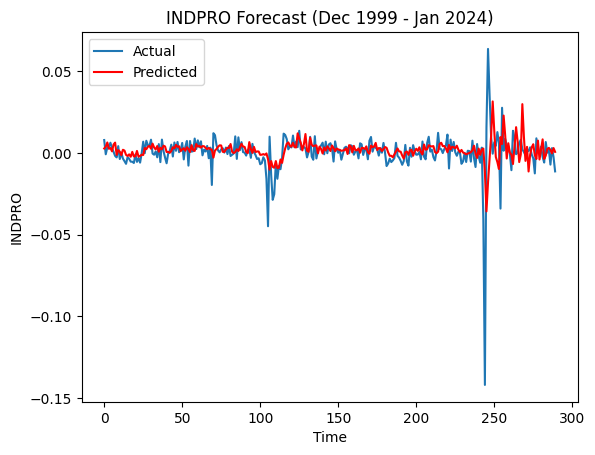

In [ ]:
forecast_start_date = pd.to_datetime('1999-12-01')
forecast_end_date = pd.to_datetime('2024-01-01')

train = series[df_cleaned['sasdate'] < forecast_start_date].values
test = series[(df_cleaned['sasdate'] >= forecast_start_date) & (df_cleaned['sasdate'] <= forecast_end_date)].values

# Train autoregression model
# Adjust the window size as needed
window = 29
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params

# Walk forward over time steps in test set
history = train[len(train) - window:]
history = [history[i] for i in range(len(history))]
predictions = list()

for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length - window, length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d + 1] * lag[window - d - 1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))  # Optional: Print predictions and actuals

# Evaluate model performance
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot actual vs. predicted values
pyplot.plot(test, label='Actual')  # Label the actual series
pyplot.plot(predictions, color='red', label='Predicted')  # Label the predicted series
pyplot.legend()  # Display the legend
pyplot.title('INDPRO Forecast (Dec 1999 - Jan 2024)')  # Add a title

pyplot.xlabel('Time')  # Label the x-axis
pyplot.ylabel('INDPRO')  # Label the y-axis
pyplot.show()